# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [3]:
cities

['port hardy',
 'lebu',
 'punta arenas',
 'taolanaro',
 'grand river south east',
 'kahului',
 'ushuaia',
 'avarua',
 'derzhavinsk',
 'busselton',
 'miram shah',
 'rikitea',
 'dikson',
 'saskylakh',
 'togur',
 'georgetown',
 'luanda',
 'khatanga',
 'albany',
 'guerrero negro',
 'marcona',
 'pisco',
 'asayita',
 'hermanus',
 'taoudenni',
 'varhaug',
 'saint-philippe',
 'bethel',
 'attawapiskat',
 'cherskiy',
 'amderma',
 'devonport',
 'vylgort',
 'torbay',
 'illoqqortoormiut',
 'hobart',
 'yar-sale',
 'jieshi',
 'ola',
 'cobija',
 'victoria',
 'bluff',
 'mahebourg',
 'morant bay',
 'luena',
 'namibe',
 'castro',
 'puerto narino',
 'atuona',
 'sitka',
 'komsomolskiy',
 'broome',
 'mar del plata',
 'luderitz',
 'jamestown',
 'constantine',
 'east london',
 'lodwar',
 'mtinko',
 'puerto ayora',
 'guatire',
 'upernavik',
 'makarska',
 'xichang',
 'lagoa',
 'chapais',
 'arraial do cabo',
 'ampanihy',
 'makakilo city',
 'belushya guba',
 'faanui',
 'tuatapere',
 'koulamoutou',
 'sept-iles',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print('Beginning Data Retrieval\n-----------------------------\n')

weather_list = []
rcd = 0
sets = 1

for city in cities:

    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
        
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    
    weather = requests.get(url).json()
    
    try:
        weather_list.append({
            'city': city,
            'lat': weather['coord']['lat'],
            'lng': weather['coord']['lon'],
            'temp': weather['main']['temp_max'],
            'humidity': weather['main']['humidity'],
            'wind':weather['wind']['speed'],
            'cloudiness':weather['clouds']['all'],
            'country':weather['sys']['country'],
            'date':weather['dt']
        })
        
    except:
        print('City not found. Skipping...')
        pass
    
print('-----------------------------\nData Retrieval Complete\n-----------------------------')
        

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | port hardy
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | derzhavinsk
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | miram shah
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | togur
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | luanda
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | marcona
City not found. Ski

Processing Record 38 of Set 4 | tanda
Processing Record 39 of Set 4 | nemuro
Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | aksarka
Processing Record 42 of Set 4 | jinji
Processing Record 43 of Set 4 | bosanska dubica
Processing Record 44 of Set 4 | qaqortoq
Processing Record 45 of Set 4 | sabha
Processing Record 46 of Set 4 | mandera
Processing Record 47 of Set 4 | siavonga
Processing Record 48 of Set 4 | york
Processing Record 49 of Set 4 | haines junction
Processing Record 50 of Set 4 | ensley
Processing Record 1 of Set 5 | ugoofaaru
Processing Record 2 of Set 5 | kutum
Processing Record 3 of Set 5 | souillac
Processing Record 4 of Set 5 | bonavista
Processing Record 5 of Set 5 | kedrovyy
Processing Record 6 of Set 5 | molina
Processing Record 7 of Set 5 | malakal
Processing Record 8 of Set 5 | kraskino
Processing Record 9 of Set 5 | kruisfontein
Processing Record 10 of Set 5 | gryazi
Processing Record 11 of Set 5 | kushiro
Processing Record 12 of Set 5 |

Processing Record 31 of Set 8 | banda aceh
Processing Record 32 of Set 8 | tautira
Processing Record 33 of Set 8 | maues
Processing Record 34 of Set 8 | vila velha
Processing Record 35 of Set 8 | monrovia
Processing Record 36 of Set 8 | sistranda
Processing Record 37 of Set 8 | ambon
Processing Record 38 of Set 8 | sawang daen din
Processing Record 39 of Set 8 | sringeri
Processing Record 40 of Set 8 | adrar
Processing Record 41 of Set 8 | krasnyy chikoy
Processing Record 42 of Set 8 | ambulu
Processing Record 43 of Set 8 | the valley
Processing Record 44 of Set 8 | hammerfest
Processing Record 45 of Set 8 | korla
Processing Record 46 of Set 8 | diu
Processing Record 47 of Set 8 | solginskiy
Processing Record 48 of Set 8 | broken hill
Processing Record 49 of Set 8 | matagami
Processing Record 50 of Set 8 | nelson bay
Processing Record 1 of Set 9 | linares
Processing Record 2 of Set 9 | rio grande
Processing Record 3 of Set 9 | tabulbah
City not found. Skipping...
Processing Record 4 of

Processing Record 15 of Set 12 | merauke
Processing Record 16 of Set 12 | ibra
Processing Record 17 of Set 12 | mount gambier
Processing Record 18 of Set 12 | medea
Processing Record 19 of Set 12 | pangai
Processing Record 20 of Set 12 | kiruna
Processing Record 21 of Set 12 | okha
Processing Record 22 of Set 12 | baruipur
Processing Record 23 of Set 12 | mayumba
Processing Record 24 of Set 12 | los llanos de aridane
Processing Record 25 of Set 12 | el balyana
City not found. Skipping...
Processing Record 26 of Set 12 | dukat
Processing Record 27 of Set 12 | ahome
Processing Record 28 of Set 12 | plettenberg bay
Processing Record 29 of Set 12 | samarai
Processing Record 30 of Set 12 | sesimbra
Processing Record 31 of Set 12 | porto velho
Processing Record 32 of Set 12 | mbandaka
Processing Record 33 of Set 12 | shanghai
Processing Record 34 of Set 12 | gurgan
City not found. Skipping...
Processing Record 35 of Set 12 | santa fe
Processing Record 36 of Set 12 | birao
Processing Record 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
city_data = pd.DataFrame(weather_list)
city_data.date = city_data.date.map(time.ctime)
city_data.to_csv('output_data/city_data.csv')
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,port hardy,50.6996,-127.4199,51.80,87,3.44,75,CA,Mon Apr 26 19:30:15 2021
1,lebu,-37.6167,-73.6500,53.38,88,9.53,26,CL,Mon Apr 26 19:29:42 2021
2,punta arenas,-53.1500,-70.9167,42.80,100,3.44,90,CL,Mon Apr 26 19:35:01 2021
3,kahului,20.8947,-156.4700,80.60,61,9.22,40,US,Mon Apr 26 19:34:45 2021
4,ushuaia,-54.8000,-68.3000,42.80,81,2.30,75,AR,Mon Apr 26 19:26:13 2021


In [6]:
city_data.describe()

,lat,lng,temp,humidity,wind,cloudiness
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,19.949890,20.396938,60.614927,70.717949,7.306007,55.849817
std,33.628716,90.401794,19.525239,21.986425,5.116475,38.270445
min,-54.800000,-179.166700,8.600000,4.000000,0.160000,0.000000
25%,-7.221075,-57.263475,45.115000,60.250000,3.440000,20.000000
50%,22.622500,24.675000,62.980000,76.000000,6.095000,69.500000
75%,49.377800,99.689050,77.000000,87.000000,9.220000,94.000000
max,78.218600,179.316700,96.760000,100.000000,36.780000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_data = city_data.loc[city_data["humidity"]<= 100]
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,port hardy,50.6996,-127.4199,51.80,87,3.44,75,CA,Mon Apr 26 19:30:15 2021
1,lebu,-37.6167,-73.6500,53.38,88,9.53,26,CL,Mon Apr 26 19:29:42 2021
2,punta arenas,-53.1500,-70.9167,42.80,100,3.44,90,CL,Mon Apr 26 19:35:01 2021
3,kahului,20.8947,-156.4700,80.60,61,9.22,40,US,Mon Apr 26 19:34:45 2021
4,ushuaia,-54.8000,-68.3000,42.80,81,2.30,75,AR,Mon Apr 26 19:26:13 2021


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

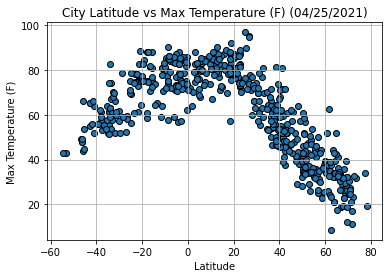

In [9]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (F) (04/25/2021)')
plt.scatter(city_data['lat'],city_data['temp'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/city_lat_vs_max_temp.png")

## Latitude vs. Humidity Plot

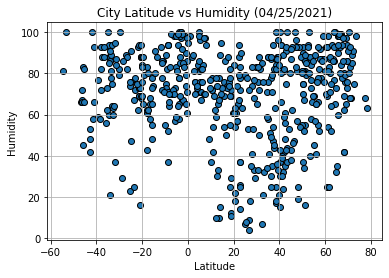

In [10]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity (04/25/2021)')
plt.scatter(city_data['lat'],city_data['humidity'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

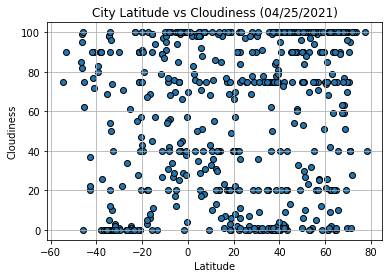

In [11]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness (04/25/2021)')
plt.scatter(city_data['lat'],city_data['cloudiness'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs Cloudiness_.png")

## Latitude vs. Wind Speed Plot

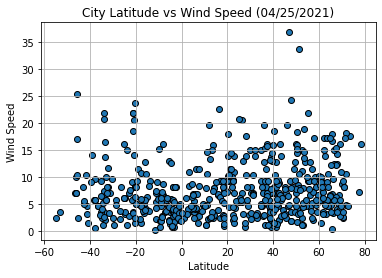

In [12]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed (04/25/2021)')
plt.scatter(city_data['lat'],city_data['wind'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs_Wind_Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
northern_pd = city_data.loc[city_data["lat"]>= 0]
southern_pd = city_data.loc[city_data["lat"]<= 0]

The St. Pearson Correlation Coefficient between both factors is -0.9


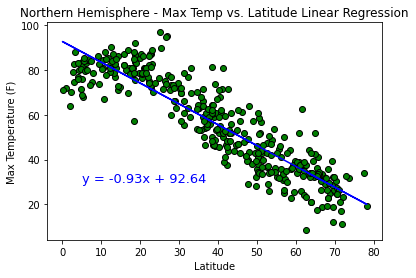

<Figure size 432x288 with 0 Axes>

In [14]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['temp'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'],northern_pd['temp'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.71


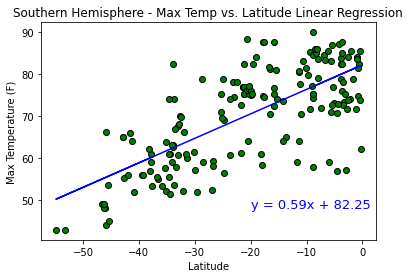

<Figure size 432x288 with 0 Axes>

In [15]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['temp'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-20,48), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['temp'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.19


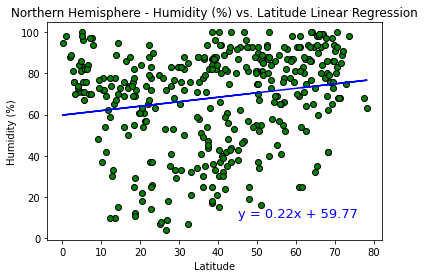

<Figure size 432x288 with 0 Axes>

In [16]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['humidity'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(45,10), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'],northern_pd['humidity'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.14


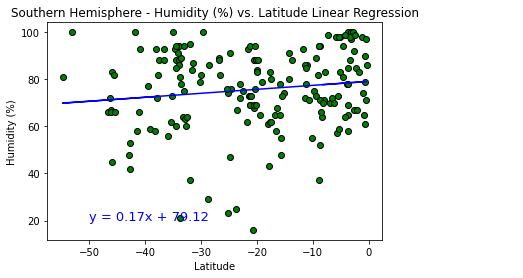

<Figure size 432x288 with 0 Axes>

In [17]:
# establish linear regression values 
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['humidity'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')

# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-50,20), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['humidity'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="blue") 
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.12


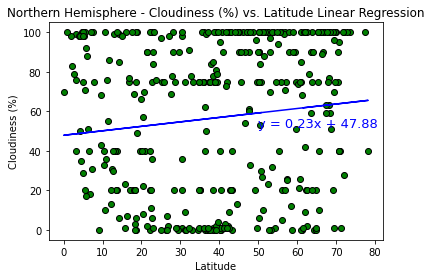

<Figure size 432x288 with 0 Axes>

In [18]:
establish_linear_regression_values = linregress(city_data["lat"], city_data["cloudiness"])
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['cloudiness'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(50,52), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'], northern_pd['cloudiness'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.17


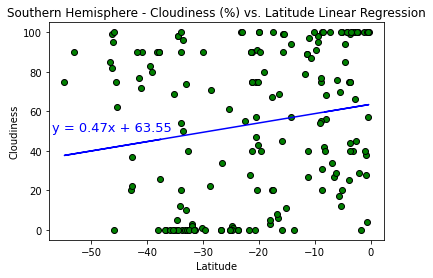

<Figure size 432x288 with 0 Axes>

In [24]:
# establish linear regression values 
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['cloudiness'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-57,50), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['cloudiness'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.15


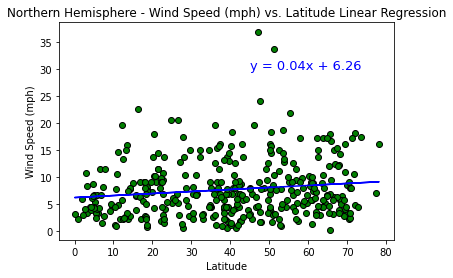

<Figure size 432x288 with 0 Axes>

In [20]:
# establish linear regression values = linregress(city_data ("lat","wind".values)
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['wind'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(45,30), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'],northern_pd['wind'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is -0.21


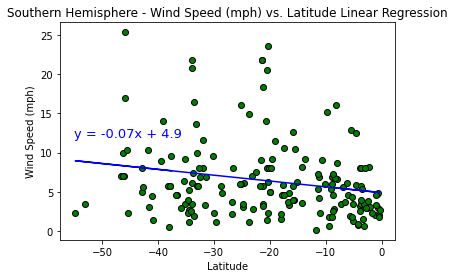

<Figure size 432x288 with 0 Axes>

In [22]:
# establish linear regression values = linregress(city_data ("lat","wind".values)
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['wind'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-55,12), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['wind'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")